In [1]:
# 1. Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

import os


In [ ]:
dataSetPath = r"iris.csv"

dataset = pd.read_csv(dataSetPath)

dataSetName = os.path.basename(dataSetPath)
print(f"Dataset Columns: {dataset.columns.to_list()}")
print("****************************")
print(f"Dataset Shape: {dataset.shape}")
print("****************************")

totalNumberOfRowInActualDataset = len(dataset)
print(f"Total Rows in dataset File: {totalNumberOfRowInActualDataset}")

Dataset Columns: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']
****************************
Dataset Shape: (150, 5)
****************************
Total Rows in dataset File: 150


In [4]:
dataset.drop_duplicates(inplace=True)
print(f"Dataset Shape after removing duplcates: {dataset.shape}")
print("****************************")

numberOfRowAfterRemovingDuplicates = len(dataset)
print(f"Remaining Rows in Dataset: {numberOfRowAfterRemovingDuplicates}")

print("****************************")
print(f"Total Duplicates: {(totalNumberOfRowInActualDataset - numberOfRowAfterRemovingDuplicates)}")

Dataset Shape after removing duplcates: (149, 5)
****************************
Remaining Rows in Dataset: 149
****************************
Total Duplicates: 1


In [5]:
# Step 2: Handle missing values (remove rows with missing values)
cleanedDataset = dataset.dropna()
numberOfRowAfterRemovingNullValues = len(cleanedDataset)
print(f"Remaining Rows in Dataset: {numberOfRowAfterRemovingNullValues}")

print("****************************")
print(f"Removed Number of rows containing Null Values: {( numberOfRowAfterRemovingDuplicates - numberOfRowAfterRemovingNullValues)}")

Remaining Rows in Dataset: 149
****************************
Removed Number of rows containing Null Values: 0


In [6]:
cleanedDataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
cleanedDataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [8]:
# Encode the target column if it's categorical
if cleanedDataset[cleanedDataset.columns.to_list()[-1]].dtype == 'object':
    cleanedDataset[cleanedDataset.columns.to_list()[-1]] = cleanedDataset[cleanedDataset.columns.to_list()[-1]].astype('category').cat.codes


In [9]:
cleanedDataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       149 non-null    int8   
dtypes: float64(4), int8(1)
memory usage: 6.0 KB


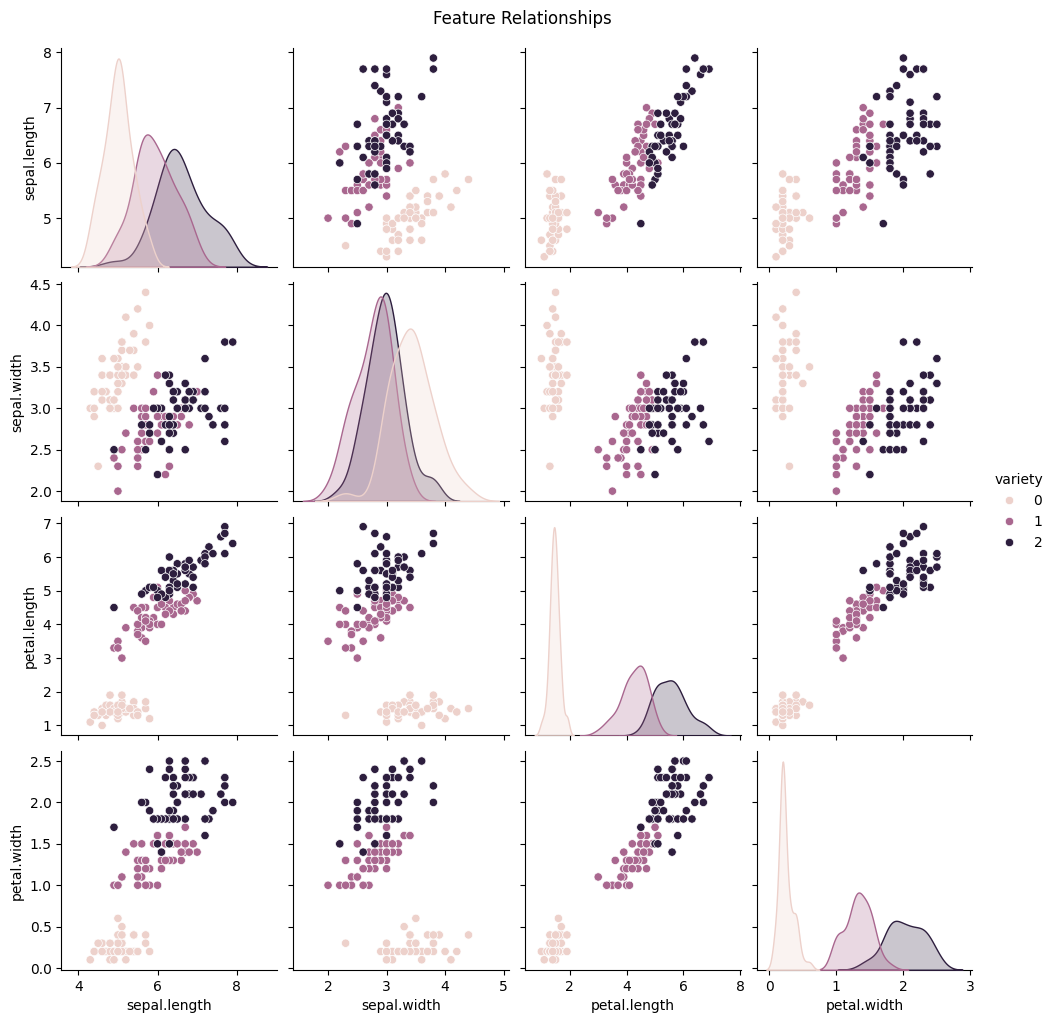

In [10]:
# 5. Exploratory Data Analysis (EDA) and Plotting
# Pairplot for feature visualization
sns.pairplot(cleanedDataset, hue='variety', diag_kind='kde')
plt.suptitle("Feature Relationships", y=1.02)
plt.show()




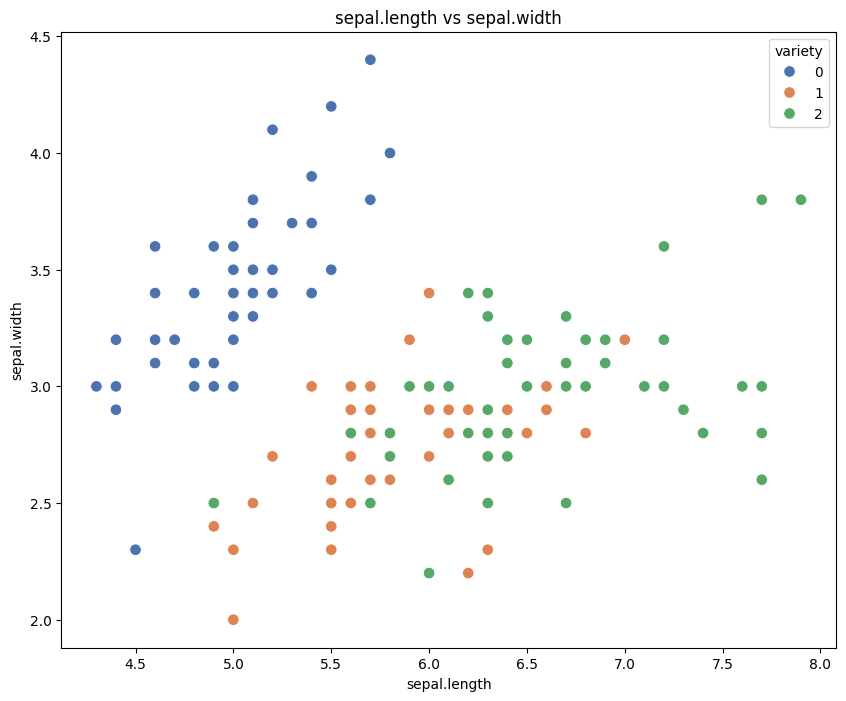

In [11]:
# Scatterplot of features
firstFeatureIndex = 0
secondFeatureIndex = 1
plt.figure(figsize=(10, 8))
sns.scatterplot(x=cleanedDataset[cleanedDataset.columns.to_list()[firstFeatureIndex]], y=cleanedDataset[cleanedDataset.columns.to_list()[secondFeatureIndex]], hue=cleanedDataset[cleanedDataset.columns.to_list()[-1]], palette='deep', s=70)
plt.title(f"{cleanedDataset.columns.to_list()[firstFeatureIndex]} vs {cleanedDataset.columns.to_list()[secondFeatureIndex]}")
plt.show()

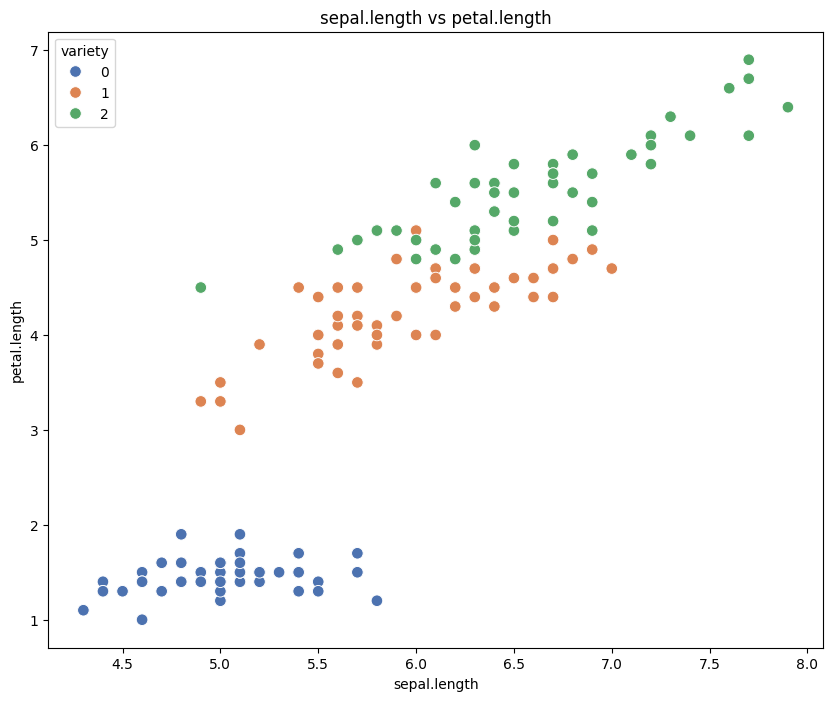

In [12]:
# Scatterplot of features
firstFeatureIndex = 0
secondFeatureIndex = 2
plt.figure(figsize=(10, 8))
sns.scatterplot(x=cleanedDataset[cleanedDataset.columns.to_list()[firstFeatureIndex]], y=cleanedDataset[cleanedDataset.columns.to_list()[secondFeatureIndex]], hue=cleanedDataset[cleanedDataset.columns.to_list()[-1]], palette='deep', s=70)
plt.title(f"{cleanedDataset.columns.to_list()[firstFeatureIndex]} vs {cleanedDataset.columns.to_list()[secondFeatureIndex]}")
plt.show()

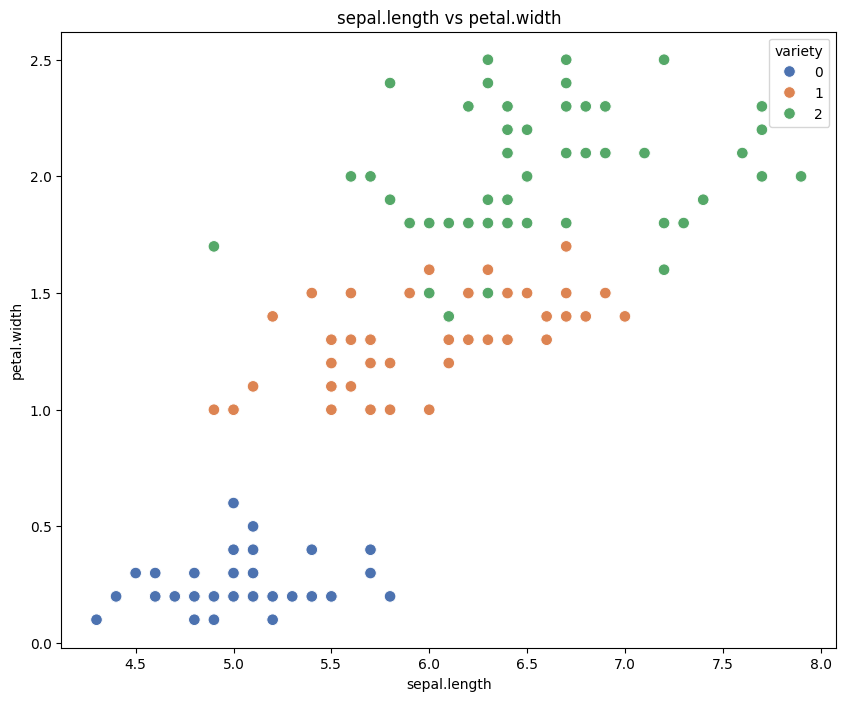

In [13]:
# Scatterplot of features
firstFeatureIndex = 0
secondFeatureIndex = 3
plt.figure(figsize=(10, 8))
sns.scatterplot(x=cleanedDataset[cleanedDataset.columns.to_list()[firstFeatureIndex]], y=cleanedDataset[cleanedDataset.columns.to_list()[secondFeatureIndex]], hue=cleanedDataset[cleanedDataset.columns.to_list()[-1]], palette='deep', s=70)
plt.title(f"{cleanedDataset.columns.to_list()[firstFeatureIndex]} vs {cleanedDataset.columns.to_list()[secondFeatureIndex]}")
plt.show()

In [ ]:
# Scatterplot of features
firstFeatureIndex = 1
secondFeatureIndex = 2
plt.figure(figsize=(10, 8))
sns.scatterplot(x=cleanedDataset[cleanedDataset.columns.to_list()[firstFeatureIndex]], y=cleanedDataset[cleanedDataset.columns.to_list()[secondFeatureIndex]], hue=cleanedDataset[cleanedDataset.columns.to_list()[-1]], palette='deep', s=70)
plt.title(f"{cleanedDataset.columns.to_list()[firstFeatureIndex]} vs {cleanedDataset.columns.to_list()[secondFeatureIndex]}")
plt.show()

In [ ]:
# Scatterplot of features
firstFeatureIndex = 1
secondFeatureIndex = 3
plt.figure(figsize=(10, 8))
sns.scatterplot(x=cleanedDataset[cleanedDataset.columns.to_list()[firstFeatureIndex]], y=cleanedDataset[cleanedDataset.columns.to_list()[secondFeatureIndex]], hue=cleanedDataset[cleanedDataset.columns.to_list()[-1]], palette='deep', s=70)
plt.title(f"{cleanedDataset.columns.to_list()[firstFeatureIndex]} vs {cleanedDataset.columns.to_list()[secondFeatureIndex]}")
plt.show()

In [ ]:
# Scatterplot of features
firstFeatureIndex = 2
secondFeatureIndex = 3
plt.figure(figsize=(10, 8))
sns.scatterplot(x=cleanedDataset[cleanedDataset.columns.to_list()[firstFeatureIndex]], y=cleanedDataset[cleanedDataset.columns.to_list()[secondFeatureIndex]], hue=cleanedDataset[cleanedDataset.columns.to_list()[-1]], palette='deep', s=70)
plt.title(f"{cleanedDataset.columns.to_list()[firstFeatureIndex]} vs {cleanedDataset.columns.to_list()[secondFeatureIndex]}")
plt.show()

In [14]:
# 6. Splitting Data (40% for Testing, 60% for Training)
X = cleanedDataset.iloc[:, :-1]  # Features
y = cleanedDataset.iloc[:, -1]   # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (89, 4)
Testing Data Shape: (60, 4)


c:\Users\mubi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


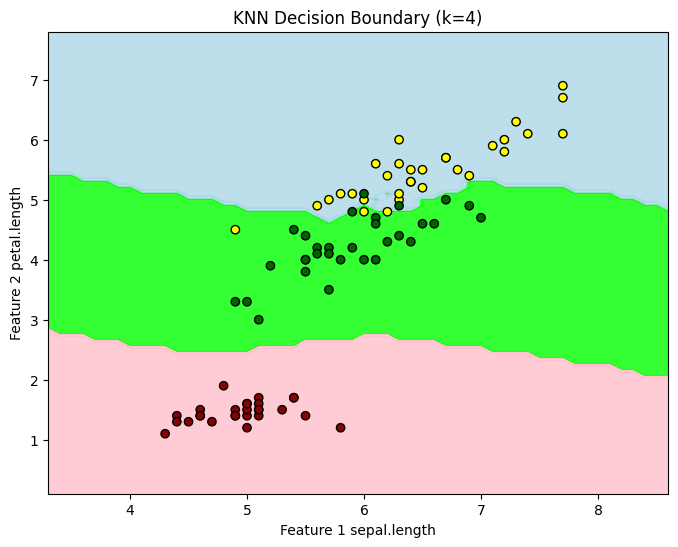

In [15]:
# 7. Instantiating KNN Model
k = 4  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
# Use only two features for visualization
firstFeatureIndex = 0
secondFeatureIndex = 2

X_train_vis = X_train.iloc[:, [firstFeatureIndex, secondFeatureIndex]]

knn.fit(X_train_vis, y_train)

# Plot decision boundary
x_min, x_max = X_train_vis.iloc[:, 0].min() - 1, X_train_vis.iloc[:, 0].max() + 1
y_min, y_max = X_train_vis.iloc[:, 1].min() - 1, X_train_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['pink', 'lime', 'lightblue']))
plt.scatter(X_train_vis.iloc[:, 0], X_train_vis.iloc[:, 1], c=y_train, edgecolor='k', cmap=ListedColormap(['darkred', 'darkgreen', 'yellow']))
plt.title(f"KNN Decision Boundary (k={k})")
plt.xlabel(f"Feature 1 {cleanedDataset.columns.to_list()[firstFeatureIndex]}")
plt.ylabel(f"Feature 2 {cleanedDataset.columns.to_list()[secondFeatureIndex]}")
plt.show()
 

In [ ]:
# 7. Instantiating KNN Model
k = 4  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
# Use only two features for visualization
firstFeatureIndex = 1
secondFeatureIndex = 2

X_train_vis = X_train.iloc[:, [firstFeatureIndex, secondFeatureIndex]]

knn.fit(X_train_vis, y_train)

# Plot decision boundary
x_min, x_max = X_train_vis.iloc[:, 0].min() - 1, X_train_vis.iloc[:, 0].max() + 1
y_min, y_max = X_train_vis.iloc[:, 1].min() - 1, X_train_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['pink', 'lime', 'lightblue']))
plt.scatter(X_train_vis.iloc[:, 0], X_train_vis.iloc[:, 1], c=y_train, edgecolor='k', cmap=ListedColormap(['darkred', 'darkgreen', 'yellow']))
plt.title(f"KNN Decision Boundary (k={k})")
plt.xlabel(f"Feature 1 {cleanedDataset.columns.to_list()[firstFeatureIndex]}")
plt.ylabel(f"Feature 2 {cleanedDataset.columns.to_list()[secondFeatureIndex]}")
plt.show()
 

In [ ]:
# 10. Model Prediction and Euclidean Distance Visualization
test_point = X_test.iloc[0, :2].values  # Test on the first row
distances = np.sqrt(np.sum((X_train.iloc[:, :2].values - test_point) ** 2, axis=1))
nearest_indices = np.argsort(distances)[:k]

# Visualizing nearest neighbors
plt.figure(figsize=(8, 6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c='gray', label='Training Points', alpha=0.6)
plt.scatter(X_test.iloc[0, 0], X_test.iloc[0, 1], c='red', label='Test Point', edgecolor='k', s=100)
plt.scatter(X_train.iloc[nearest_indices, 0], X_train.iloc[nearest_indices, 1], c='blue', label='Nearest Neighbors', edgecolor='k')
plt.title("KNN Nearest Neighbors Visualization")
plt.legend()
plt.show()



In [ ]:
# 11. Other Visualizations for Teaching
# Bar plot for feature importance (not directly applicable to KNN, but good for comparison)
plt.figure(figsize=(8, 6))
sns.boxplot(data=X_train, orient="v")
plt.title("Feature Distribution in Training Data")
plt.show()



c:\Users\mubi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


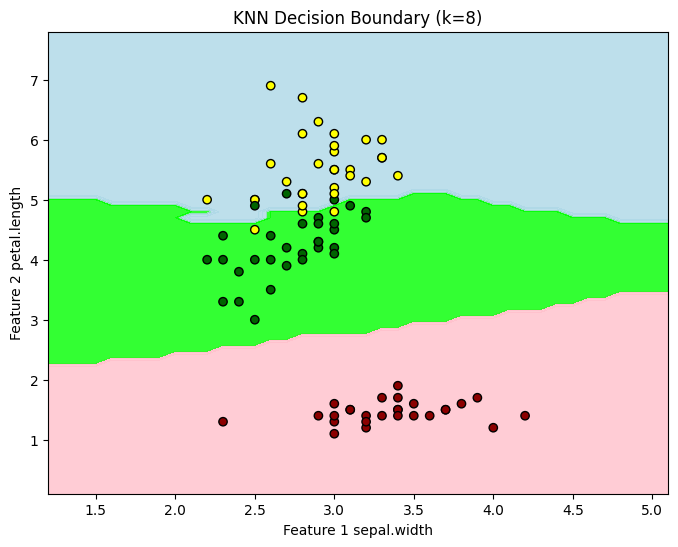

In [16]:
# 7. Instantiating KNN Model
k = 8  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
# Use only two features for visualization
firstFeatureIndex = 1
secondFeatureIndex = 2

X_train_vis = X_train.iloc[:, [firstFeatureIndex, secondFeatureIndex]]

knn.fit(X_train_vis, y_train)

# Plot decision boundary
x_min, x_max = X_train_vis.iloc[:, 0].min() - 1, X_train_vis.iloc[:, 0].max() + 1
y_min, y_max = X_train_vis.iloc[:, 1].min() - 1, X_train_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['pink', 'lime', 'lightblue']))
plt.scatter(X_train_vis.iloc[:, 0], X_train_vis.iloc[:, 1], c=y_train, edgecolor='k', cmap=ListedColormap(['darkred', 'darkgreen', 'yellow']))
plt.title(f"KNN Decision Boundary (k={k})")
plt.xlabel(f"Feature 1 {cleanedDataset.columns.to_list()[firstFeatureIndex]}")
plt.ylabel(f"Feature 2 {cleanedDataset.columns.to_list()[secondFeatureIndex]}")
plt.show()
 